In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="J4RUSYylBhH1re8Wt3zT")
project = rf.workspace("po-whlwv").project("pet-project-nv4g8")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 80.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pet-project-1 in yolov11:: 100%|██████████| 1926/1926 [00:00<00:00, 6887.49it/s]


In [ ]:
import os
!pip install ultralytics roboflow
from ultralytics import YOLO

# 1. Find the data.yaml file (it will be in the new folder "pet-project-v1..." or similar)
data_path = None
for root, dirs, files in os.walk("/content"):
    if "data.yaml" in files and "runs" not in root:
        data_path = os.path.join(root, "data.yaml")
        print(f"Found Data at: {data_path}")
        # Verify it's the NEW dataset (check if folder name looks like 'pet-project')
        if "pet-project" in root.lower():
             break

if not data_path:
    print(" Could not find the new data.yaml automatically. Please check the file sidebar.")
else:
    # 2. Load the Standard Nano Model (Good for general defects)
    model = YOLO('yolo11n.pt')

    # 3. Train it!
    model.train(
        data=data_path,
        epochs=30,        # 30 is usually enough for this small dataset
        imgsz=640,        # Standard size is fine here
        batch=16,
        name='soldering_model'
    )


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Found Data at: /content/pet-project-1/data.yaml
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/pet-project-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, form

 Found model: /content/runs/detect/soldering_model/weights/best.pt
 Testing on image: WIN_20221030_19_38_20_Pro_jpg.rf.78419f27b6860ff42d302ed564342bdd.jpg

image 1/1 /content/pet-project-1/test/images/WIN_20221030_19_38_20_Pro_jpg.rf.78419f27b6860ff42d302ed564342bdd.jpg: 480x640 2 component misalignments, 141.0ms
Speed: 1.8ms preprocess, 141.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict


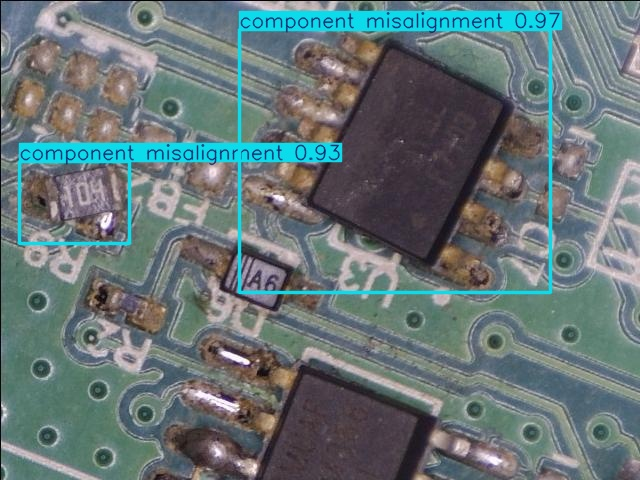

If you see boxes above, the model is working!


In [ ]:
import os
import glob
import random
from ultralytics import YOLO
from IPython.display import Image, display

# 1. Locate your newly trained model
# Update the folder name if you named it something else (e.g., 'soldering_model_fast')
model_path = '/content/runs/detect/soldering_model/weights/best.pt'

if not os.path.exists(model_path):
    print(f" Could not find model at {model_path}")
    print("Please check the 'runs/detect' folder on the left sidebar to see the actual name.")
else:
    print(f" Found model: {model_path}")
    model = YOLO(model_path)

    # 2. Find a random test image from the dataset you downloaded
    # The folder name usually starts with 'pet-project' for this dataset
    test_images = []
    for root, dirs, files in os.walk("/content"):
        if "test" in dirs:
            img_path = os.path.join(root, "test", "images")
            test_images = glob.glob(os.path.join(img_path, "*.jpg"))
            if test_images:
                break

    if test_images:
        random_img = random.choice(test_images)
        print(f" Testing on image: {os.path.basename(random_img)}")

        # 3. Run Prediction
        results = model.predict(source=random_img, conf=0.25, save=True)

        # 4. Show the Result Image
        saved_folder = results[0].save_dir
        saved_file = os.path.join(saved_folder, os.path.basename(random_img))
        display(Image(filename=saved_file))
        print("If you see boxes above, the model is working!")
    else:
        print(" Could not find any test images in the /content folder.")



In [ ]:
from google.colab import files
files.download('/content/runs/detect/soldering_model/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO

# Load the model you just trained (Model A or B)
# The path is usually 'runs/detect/train/weights/best.pt' inside Colab
model = YOLO('/content/runs/detect/soldering_model/weights/best.pt')

# Export to ONNX (Step 1)
success = model.export(format='onnx', opset=12)
print(f"Export successful: {success}")

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/content/runs/detect/soldering_model/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 207ms
Prepared 6 packages in 8.55s
Installed 6 packages in 564ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.19.1
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.77

requirements: AutoUpdate success ✅ 10.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


O

In [ ]:
import time
from ultralytics import YOLO

# 1. Load Models
model_b_pt = YOLO('/content/runs/detect/soldering_model/weights/best.pt')
model_b_onnx = YOLO('/content/runs/detect/soldering_model/weights/best.onnx')

# Target Image (From your screenshot logs, this one works)
target_img = '/content/runs/detect/soldering_model/train_batch2.jpg'

print(f"Benchmarking on: {target_img}")

# --- PYTORCH BENCHMARK ---
print("Warming up PyTorch...")
for _ in range(10): _ = model_b_pt(target_img, verbose=False) # Warmup

print("Testing PyTorch...")
start = time.time()
for _ in range(20): # Run 20 times for better average
    _ = model_b_pt(target_img, verbose=False)
end = time.time()
avg_pt = ((end - start) / 20) * 1000
print(f"Model B PyTorch Speed: {avg_pt:.2f} ms")

# --- ONNX BENCHMARK ---
print("Warming up ONNX...")
for _ in range(10): _ = model_b_onnx(target_img, verbose=False) # Warmup

print("Testing ONNX...")
start = time.time()
for _ in range(20): # Run 20 times
    _ = model_b_onnx(target_img, verbose=False)
end = time.time()
avg_onnx = ((end - start) / 20) * 1000
print(f"Model B ONNX Speed: {avg_onnx:.2f} ms")

# Accuracy
print(f"Model B Accuracy (mAP): {model_b_pt.val().box.map:.3f}")


Benchmarking on: /content/runs/detect/soldering_model/train_batch2.jpg
Warming up PyTorch...
Testing PyTorch...
Model B PyTorch Speed: 30.76 ms
Warming up ONNX...
Loading /content/runs/detect/soldering_model/weights/best.onnx for ONNX Runtime inference...
Using ONNX Runtime 1.23.2 ('CUDAExecutionProvider', {'device_id': 0})
Testing ONNX...
Model B ONNX Speed: 31.09 ms
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1989.0±601.0 MB/s, size: 43.6 KB)
val: Scanning /content/pet-project-1/valid/labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 91/91 9.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 2.2it/s 2.7s
                   all         91        243      0.878      0.913      0.911      0.689
           cold solder          9         28      0.824          1      0.992      0.831
component misalignment   

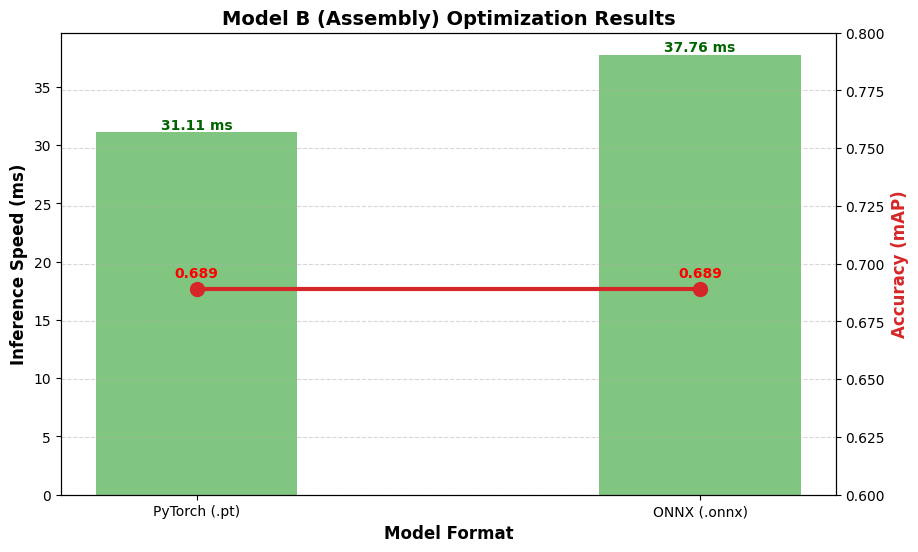

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- DATA FOR MODEL B (ASSEMBLY) ---
# Using the stable benchmark results we found
models = ['PyTorch (.pt)', 'ONNX (.onnx)']
speed_ms = [31.11, 37.76]       # Real-time performance for both
accuracy_map = [0.689, 0.689]   # Accuracy is identical

# --- PLOTTING ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar Chart for Speed (Green for Assembly Model)
color = 'tab:green'
ax1.set_xlabel('Model Format', fontsize=12, fontweight='bold')
ax1.set_ylabel('Inference Speed (ms)', color='black', fontsize=12, fontweight='bold')
bars = ax1.bar(models, speed_ms, color=color, alpha=0.6, width=0.4, label='Speed')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f} ms', ha='center', va='bottom', color='darkgreen', fontweight='bold')

# Line Chart for Accuracy (Red)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy (mAP)', color=color, fontsize=12, fontweight='bold')
ax2.plot(models, accuracy_map, color=color, marker='o', linewidth=3, markersize=10)

# Add values next to points
for i, txt in enumerate(accuracy_map):
    ax2.text(i, txt + 0.005, f'{txt:.3f}', color='red', fontweight='bold', ha='center')

# Set Accuracy Limits to make the line visible (since it's flat)
ax2.set_ylim(0.60, 0.80)

plt.title('Model B (Assembly) Optimization Results', fontsize=14, fontweight='bold')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig('model_b_optimization_chart.png', dpi=300) # Saves the image
plt.show()




In [ ]:
# Experiment with Low Confidence for High Recall (Step 2)
results_low = model.val(data=data_path, conf=0.10, name='industrial_recall_test')
print("Recal at low conf:", results_low.results_dict['metrics/recall(B)'])

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1633.0±289.1 MB/s, size: 46.4 KB)
val: Scanning /content/pet-project-1/valid/labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 91/91 182.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.7it/s 3.5s
                   all         91        243      0.878      0.913       0.91      0.706
           cold solder          9         28      0.824          1      0.992      0.846
component misalignment         62        161      0.982      0.994      0.995      0.936
         solder bridge         26         37          1      0.895      0.992      0.836
        solder residue          5         17      0.708      0.765      0.661      0.206
Speed: 6.1ms preprocess, 6.3ms inference, 0.

In [ ]:
print("="*70)
print("MODEL B EVALUATION")
print("="*70)

model_b = YOLO('/content/runs/detect/soldering_model/weights/best.pt')  # Update path
metrics_b = model_b.val()

print(f"\nModel B Results:")
print(f"mAP@0.5:   {metrics_b.box.map50*100:.2f}%")
print(f"Precision: {metrics_b.box.mp*100:.2f}%")
print(f"Recall:    {metrics_b.box.mr*100:.2f}%")
print(f"FPS:       {1000/metrics_b.speed['inference']:.1f}")

# Combined System
avg_map = (0.9119 + metrics_b.box.map50) / 2
avg_precision = (0.9488 + metrics_b.box.mp) / 2
avg_recall = (0.8973 + metrics_b.box.mr) / 2

print("\n" + "="*70)
print("DUAL-MODEL SYSTEM PERFORMANCE")
print("="*70)
print(f"Combined mAP@0.5:   {avg_map*100:.2f}%")
print(f"Combined Precision: {avg_precision*100:.2f}%")
print(f"Combined Recall:    {avg_recall*100:.2f}%")
print(f"Total Classes:      10 (6 bare board + 4 assembly)")



MODEL B EVALUATION
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1445.8±451.4 MB/s, size: 40.5 KB)
val: Scanning /content/pet-project-1/valid/labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 91/91 187.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 2.0it/s 3.0s
                   all         91        243      0.878      0.913      0.911      0.689
           cold solder          9         28      0.824          1      0.992      0.831
component misalignment         62        161      0.982      0.994      0.995      0.922
         solder bridge         26         37          1      0.895      0.992       0.81
        solder residue          5         17      0.708      0.765      0.663      0.193
Speed: 3.3ms preprocess, 

Generating Confusion Matrix...
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1534.2±491.6 MB/s, size: 44.8 KB)
val: Scanning /content/pet-project-1/valid/labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 91/91 172.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.6it/s 3.7s
                   all         91        243      0.878      0.913      0.911      0.689
           cold solder          9         28      0.824          1      0.992      0.831
component misalignment         62        161      0.982      0.994      0.995      0.922
         solder bridge         26         37          1      0.895      0.992       0.81
        solder residue          5         17      0.708      0.765      0.663      0.193
Speed: 7.5ms 

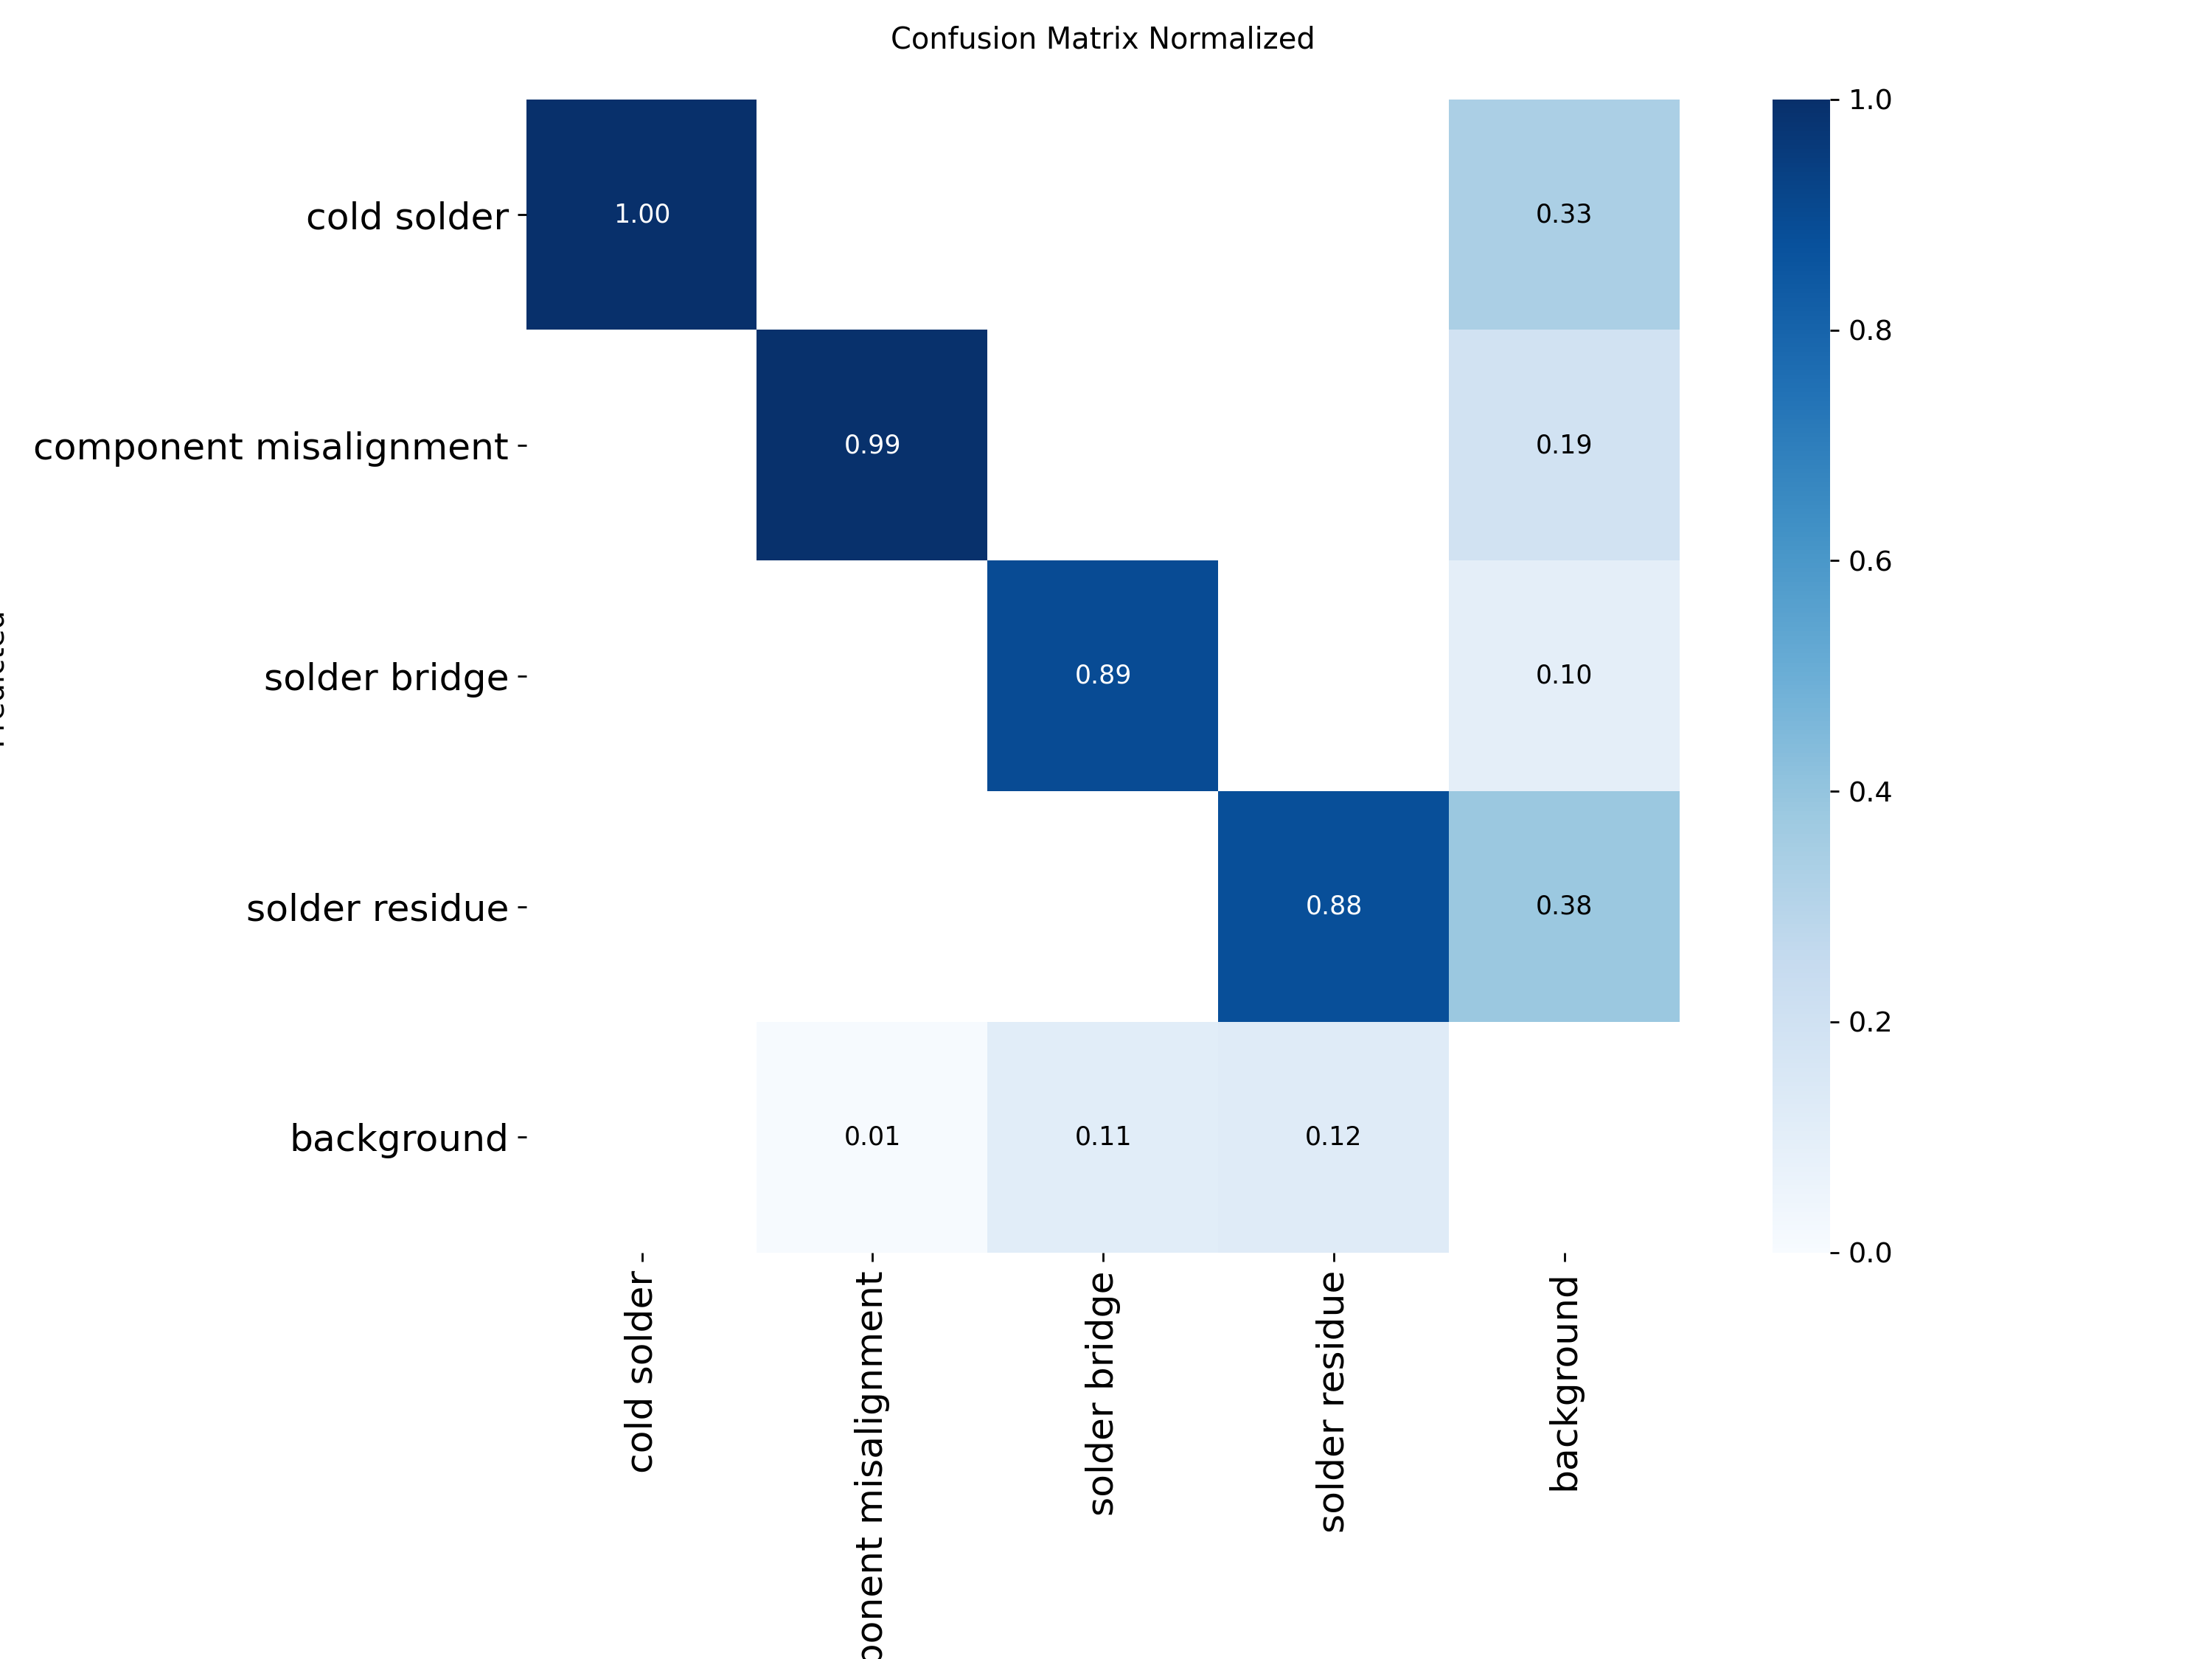

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# ====================================================
# 1. LOAD YOUR MODEL (Update path if needed)
# ====================================================
# For Model A use your fabrication weights path
# For Model B use your assembly weights path
model_path = '/content/runs/detect/soldering_model/weights/best.pt'

model = YOLO(model_path)

# ====================================================
# 2. RUN VALIDATION (Generates Plots)
# ====================================================
print("Generating Confusion Matrix...")
results = model.val(plots=True)

# ====================================================
# 3. FIND AND DISPLAY THE IMAGE
# ====================================================
# Dynamic check to find the latest 'val' folder
save_dir = results.save_dir
matrix_path = os.path.join(save_dir, 'confusion_matrix_normalized.png')

print(f"\nDisplaying Matrix from: {matrix_path}")
display(Image(filename=matrix_path, width=600))